In [80]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [81]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [82]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [83]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [84]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [85]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [86]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [87]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [88]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

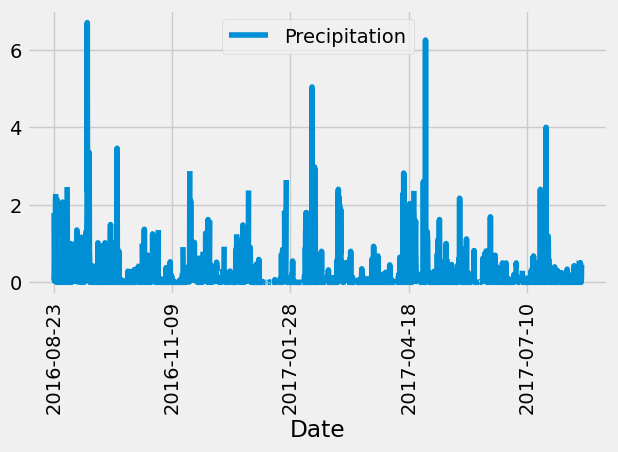

In [89]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_year_prcp = list()
one_year_dates = list()

one_year = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= "2016-08-23").all()

for date,prcp in one_year:
    one_year_prcp.append(prcp)
    one_year_dates.append(date)  

# Save the query results as a Pandas DataFrame. Explicitly set the column names
one_year_df = pd.DataFrame({'Date': one_year_dates,
                            'Precipitation': one_year_prcp}, columns=["Date", "Precipitation"])

# Sort the dataframe by date
one_year_df = one_year_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
one_year_df.plot(x="Date", y="Precipitation", rot=90)
plt.tight_layout()
plt.show()


In [90]:
# Use Pandas to calculate the summary statistics for the precipitation data
one_year_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [91]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.name)).all()
#session.query(station.name).

[(9,)]

In [92]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel=[measurement.station, func.count(measurement.station)]

active_stations = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [93]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel=[func.min(measurement.tobs),
     func.max(measurement.tobs),
     func.avg(measurement.tobs)]

active_stat = session.query(*sel).\
    filter(measurement.station == 'USC00519281').all()
active_stat

[(54.0, 85.0, 71.66378066378067)]

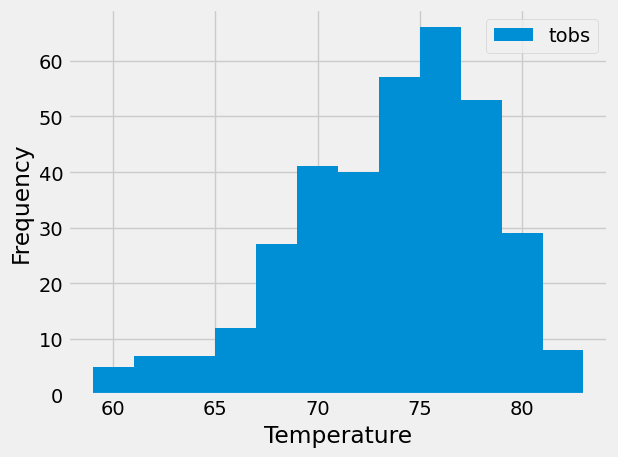

In [94]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

one_year_temps = session.query(measurement.tobs, measurement.station).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= "2016-08-23").all()

tobs = list()
for t,name in one_year_temps:
    tobs.append(t)

temps_df = pd.DataFrame(tobs, columns = ["tobs"])
#temps_df


temps_df.plot.hist(column='tobs', bins=12)
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()

# Close Session

In [95]:
# Close Session
session.close()